# Úloha 2

**téma**: Overovanie štatistických hypotéz v prostredí python<br>
**autor**: Adam Zvara, xzvara01 *(@stud.fit.vutbr.cz)*<br>
**dátum**: 19.12.2022

V tejto úlohe sa pracuje s pripraveným datasetom nehôd v jednotlivých krajoch Českej Republiky v rozmedzí rokov 2016-2021.<br>
V prvom rade je nutné pred potvrdením hypotéz import knižníc a načítanie dát.

In [20]:
# Import libraries
import pandas as pd
import scipy.stats

In [21]:
# Load dataset
df = pd.read_pickle("accidents.pkl.gz")
df

,p1,p36,p37,p2a,weekday(p2a),p2b,p6,p7,p8,p9,...,l,n,o,p,q,r,s,t,p5a,region
0,002100160001,4,-1,2016-01-01,5,55,1,1,0,2,...,,711403,,Souhlasnýsesměremúseku,Pomalý,554782,451622,GN_V0.1UIR-ADR_410,1,PHA
1,002100160002,4,-1,2016-01-01,5,130,1,3,0,2,...,,,,,,-1,-1,,1,PHA
2,002100160003,5,-1,2016-01-01,5,100,1,2,0,2,...,,,,,,-1,-1,,1,PHA
3,002100160004,6,-1,2016-01-01,5,120,9,0,0,2,...,,,,,,-1,-1,,1,PHA
4,002100160005,6,-1,2016-01-01,5,2560,2,0,0,2,...,,,,,,-1,-1,,1,PHA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572929,190906210457,6,-1,2021-08-30,1,506,2,0,0,2,...,,2611387,,,Pomalý,560359,-1,GN_V0.1UIR-ADR_410,1,KVK
572930,190906210458,6,-1,2021-08-30,1,752,2,0,0,2,...,,2541503,,Opačnýkesměruúseku,Pomalý,560383,550426,GN_V0.1UIR-ADR_410,1,KVK
572931,190906210459,3,2099,2021-08-30,1,1505,1,3,0,2,...,,,,,,-1,-1,,1,KVK
572932,190906210460,3,2099,2021-08-31,2,1245,0,0,0,1,...,2099,199764,,Opačnýkesměruúseku,Pomalý,560286,553654,GN_V0.1UIR-ADR_410,1,KVK


### Hypotéza 1:

> Na silnicích první třídy se při nehodách umíralo se stejnou pravděpodobností jako na
> silnicích třetí třídy.

Na overenie tejto hypotézy využijeme podľa zadania **$\chi^2$ test**, ktorý slúži okrem overenia závislosti 2 kategorických javov aj na overenie **homogenity** 2 javov.<br>
V podstate sa jedná o úplne rovnaký postup ako pri zisťovaní korelácie okrem nulovej hypotézy. Homogenita predstavuje proporcionálne rozdelenie výskytu skúmaných javovov v populácií ([odkaz](https://stattrek.com/chi-square-test/homogeneity)).<br>
V našom príklade to môžeme považovať za pravdepodobnosti výskytu smrteľnej nehody na cestách 1. a 3. triedy.

Pred samotným testom je však potrebné upraviť pôvodnú tabuľku. V prvom rade potrebujeme vyfiltrovať nehody mimo ciest 1. a 3. triedy.<br>
Ďalej vytvoríme nový stĺpec *lethal*, ktorý značí, že nehoda bola smrteľná (alespoň 1 osoba pri nej zahynula).

In [22]:
df_c = df.copy()
road_category = [1, 3]
# Filter first and third class roads
df_c = df_c[df["p36"].isin(road_category)]
# Add lethal column
df_c["lethal"] = df_c["p13a"] > 0
df_c

,p1,p36,p37,p2a,weekday(p2a),p2b,p6,p7,p8,p9,...,n,o,p,q,r,s,t,p5a,region,lethal
7594,002100167619,1,-1,2016-05-05,4,1135,1,2,0,2,...,1397508,,Souhlasnýsesměremúseku,Pomalý,554782,709450,GN_V0.1UIR-ADR_410,1,PHA,False
10530,003100160575,1,102,2016-06-19,0,1905,1,2,0,2,...,312370,,Souhlasnýsesměremúseku,Pomalý,554782,481548,GN_V0.1UIR-ADR_410,1,PHA,False
10532,003100160577,1,0,2016-06-19,0,1915,3,0,4,2,...,293620,,Souhlasnýsesměremúseku,Pomalý,554782,709450,GN_V0.1UIR-ADR_410,1,PHA,False
13362,003100163418,1,0,2016-08-08,1,1355,1,2,0,2,...,2374326,,Souhlasnýsesměremúseku,Pomalý,554782,506001,GN_V0.1UIR-ADR_410,1,PHA,False
21478,004100161576,1,-1,2016-12-09,5,1640,2,0,0,2,...,,,,,-1,-1,GN_V0.1UIR-ADR_410,1,PHA,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572914,190906210442,3,21036,2021-08-23,1,1238,3,0,9,1,...,2245808,,Opačnýkesměruúseku,Pomalý,560341,-1,GN_V0.1UIR-ADR_410,2,KVK,False
572922,190906210450,3,21810,2021-08-26,4,1704,1,1,0,2,...,3343415,,Souhlasnýsesměremúseku,Pomalý,560677,-1,GN_V0.1UIR-ADR_410,1,KVK,False
572931,190906210459,3,2099,2021-08-30,1,1505,1,3,0,2,...,,,,,-1,-1,,1,KVK,False
572932,190906210460,3,2099,2021-08-31,2,1245,0,0,0,1,...,199764,,Opačnýkesměruúseku,Pomalý,560286,553654,GN_V0.1UIR-ADR_410,1,KVK,False


Pred vykonaním testu je potrebné vybrané stĺpce (*p36* - druh cesty, *lethal* - nehoda bola smrteľná) zobraziť v **kontingenčnej tabuľke**.<br>
Kontingenčnú tabuľku je nutné vytvoriť, pretože na základe jej hodnôt je vykonaný test na overenie hypotézy.

In [23]:
# Create contingence table
ct = pd.crosstab(df_c["lethal"], df_c["p36"])
ct

p36,1,3
lethal,,
False,78618,73352
True,911,448


V kontingenčnej tabuľke sa nachádzajú výskyty všetkých možností pre uvedené stĺpce. Nad týmito hodnotami spravíme spomínaný $\chi^2$ test.<br>
Nulovou hypotézou testu je:

**$H_0$: pravdepodobnosť úmrtnosti na cestách 1. triedy je rovnaká ako pravdepobonosť úmrtnosti na cestách 3. triedy.**

Naopak alternatívnou hypotézou $H_1$ by bolo, že tieto pravdepobonosti nie sú rovnaké.


In [24]:
# Do chi2 test
chi2, p, d, exp = scipy.stats.chi2_contingency(ct)
print("expected", exp)
print("p-value", p)

expected [[78824.11109444 73145.88890556]
 [  704.88890556   654.11109444]]
p-value 3.5395243450138555e-29


### Výsledok

Výsledkom testu je štvorica (hodnota v rozdelení $\chi^2$, p-hodnota, stupeň volnosti, očakávané hodnoty).<br>
Očakávané hodnoty predstavujú frekvenciu výskytu jednotlivých nehôd v prípade, ak by boli pravdepodobnosti výskytu smrteľnej nehody na cestách 1. triedy<br>
a 3. triedy totožné. Avšak už teraz na prvý pohľad vidíme, že skutočné hodnoty sa pomerne líšia od očakávaných hodnôt.<br>
To môže indikovať, že pravdepodobnosti nebudú rovnaké.

In [25]:
print("Očakávané frekvencie smrteľnosti nehôd:")
print(f"1. trieda - smrteľné: {exp[1][0]:.0f}, ostatné: {exp[0][0]:.0f}")
print(f"3. trieda - smrteľné: {exp[1][1]:.0f}, ostatné: {exp[0][1]:.0f}")
print("\nSkutočné frekvencie smrteľnosti nehôd:")
print(f"1. trieda - smrteľné: {ct.loc[True, 1]}, ostatné: {ct.loc[False, 1]}")
print(f"3. trieda - smrteľné: {ct.loc[True, 3]}, ostatné: {ct.loc[False, 3]}")

Očakávané frekvencie smrteľnosti nehôd:
1. trieda - smrteľné: 705, ostatné: 78824
3. trieda - smrteľné: 654, ostatné: 73146

Skutočné frekvencie smrteľnosti nehôd:
1. trieda - smrteľné: 911, ostatné: 78618
3. trieda - smrteľné: 448, ostatné: 73352


Konkrétny výsledok ale určuje **p-hodnota**. Pre overenie hypotézy s $95\%$ mierou istoty porovnávame výslednú p-hodnotu<br>
s číslom $0.05$. Výsledná p-hodnota $3.539524345\cdot e^{-29}$ je **mnohonásobne menšia** ako $0.05$, čím **vyvraciame nulovú hypotézu**.<br>
Výsledkom je, že pravdepodobnosť úmrtia na ceste 1. triedy nie je rovnaká ako pravdepodobnosť úmrtia na ceste 3. triedy.<br>
Pri porovnávaní skutočných a očakávaných hodnôt vidíme, že nehody na cestách **1. triedy** viedli **častejšie** ku smrti účastníkov nehody.

### Hypotéza 2:

> Při nehodách vozidel značky Škoda je škoda na vozidle nižší než při nehodách vozidel Audi.

In [26]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

V prvom rade môžeme skúsiť zobraziť jednotlivý počet nehôd v závislosti od výšky škody pre jednotlivé značky áut.

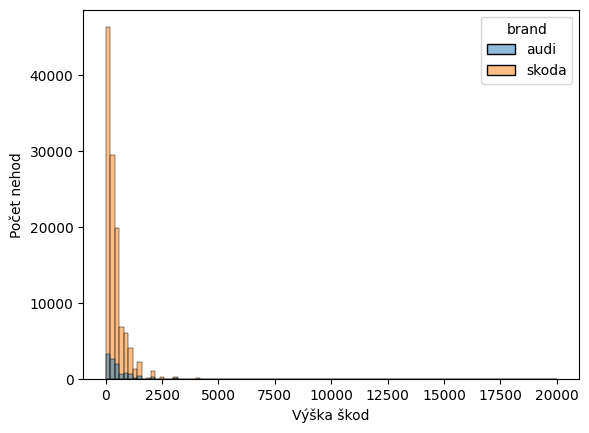

In [27]:
df_c2 = df.copy()
car_brands = {2: "audi", 39: "skoda"}
df_c2.rename(columns={"p45a": "brand", "p53": "damage"}, inplace=True)
df_c2 = df_c2[df_c2["brand"].isin(car_brands.keys())]
df_c2["brand"] = df_c2["brand"].map(car_brands)

ax = sns.histplot(data=df_c2, x="damage", stat="count", hue="brand", bins=100)
ax.set(xlabel="Výška škod", ylabel="Počet nehod")
plt.show()

Z grafu nevieme povedať, či hypotéza bude potvrdená alebo vyvrátená. Vizuálne by sme mohli mylne povedať, že škody spôsobené na autách typu škoda<br>
by mali byť vyššie, ako na autách značky audi, pretože hodnoty škôd áut škoda na začiatku histogramu prevyšujú hodnoty škôd pre autá značky audi.<br>
Tento záver však nemusí byť pravdivý, pretože z grafu nevieme napríklad vyčítať vyššie škody na autách, ktorých počet sa pohybuje v radoch desiatok áut.

Keďže vidíme, že sa nejedná ani o normálne rozdelenie, na overenie hypotézy použijeme **Mann–Whitney U test**.

### Mann–Whitney U test
Jedná sa o nepárový test, ktorého nulová hypotéza je nasledovná:
> **$H_0$: výška škody na aute značky škoda je rovnaká ako výška škody na aute značky audi.**

Alernatívnou hypotézou je, že existuje markantný rozdiel mezdi týmito pravdepodobnosťami.<br>
Pred prevedením testu je potrebné spracovať škody pre jednotlivé značky áut.

In [28]:
# Create arrays of damages for each brand
df_c3 = df_c2.set_index(["brand"])
a = df_c3.loc["audi", "damage"]
b = df_c3.loc["skoda", "damage"]

# Do Mann-Whitney U test
print("Priemerná škoda áut značky audi: ", a.median())
print("Priemerná škoda áut značky škoda: ", b.median())
scipy.stats.mannwhitneyu(a, b)

Priemerná škoda áut značky audi:  300.0
Priemerná škoda áut značky škoda:  200.0


MannwhitneyuResult(statistic=789001736.0, pvalue=4.921643600739696e-188)

### Výsledok

Z výsledku testu vidíme, že p-hodnota sa rovná $4.9216436 \cdot e^{-188}$, čo je menšie ako hodnota $0.05$, preto **nulovú hypotézu zamietame** a môžeme prehlásiť,<br>
že **existuje rozdiel** medzi veľkosťou škody pri autách typu škoda a audi. Ak sme preukázali, že tento rozdiel existuje, pozrieme sa na hodnoty mediánu pre jednotlivé<br>
značky áut. Vidíme, že pre autá značky audi sa pohybuje primerná škoda vo výške $300 \cdot 100 = 30000Kč$ a pre autá značky škoda to je $200 \cdot 100 = 20000 Kč$.

Z toho môžeme povedať, že priemerná škoda áut značky škoda je menšia než priemerná škoda na autách značky audi a **potvrdzujeme hypotézu číslo 2**.